In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import math
import networkx as nx

### Import data

In [2]:
orphans = pd.read_csv(r'E_WEB LIST OF ORPHANS _12 DELIN 03.31.2020.csv')
data = gpd.read_file(r'Wells\well013\well013b.shp')
basemap = gpd.read_file(r'Maps\Basemap013\road013l.shp')

### Define distance calculator

In [3]:
R_EARTH = 3958.8  #miles

# Use formula: angle (radians) * R_EARTH
def angleToDist(x, y): # Input: tuples x and y (lat. and long.)
    a = math.sqrt( (y[0]-x[0])**2 + (y[1]-x[1])**2 )
    return R_EARTH * (math.pi/180) * a

### Combining well datasets

In [4]:
ata_orp = orphans.query('COUNTY_NAME == "ATASCOSA"')

wellid = []
for i in ata_orp.index.values:
    wellid.append(str(ata_orp.API[i])[-5:])
    
ata_orp['WELLID'] = wellid

spatial = data.merge(ata_orp, how='right', on='WELLID')

C:\Users\jcbre\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Removes wells with invalid coordinates (NaN):

In [5]:
spatial # notice index==1 has mostly NaN values - if a datapoint has no coordinates, then we can't really work with it

,BOTTOM_ID,SURFACE_ID,SYMNUM,APINUM,RELIAB,API10,API_x,LONG27,LAT27,LONG83,...,COUNTY_NAME,FIELD_NAME,OPERATOR_NAME,OPERATOR_NO,LEASE_NAME,OG_CODE,LEASE_ID,WELL_NO,API_y,WB_Months_Inactive
0,232827.0,232827.0,5.0,4201300361,15,01300361,01300361,-98.728977,29.050913,-98.729306,...,ATASCOSA,"ANCHORAGE, SOUTH","HAILEY, E. M.",342800,"FOWLER, SAN J.",G,2,1,1300361,279
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ATASCOSA,"IMOGENE, S. (CARRIZO)","TRAVELERS OIL & GAS, INC.",865970,"RICHTER, KATE",O,700,1,1301223,279
2,240419.0,240419.0,4.0,4201300098,15,01300098,01300098,-98.791863,29.000151,-98.792166,...,ATASCOSA,KYOTE,TOMAHAWK PETROLEUM,861695,"ROGERS, THEO. -A-",O,803,4,1300098,279
3,239761.0,239761.0,4.0,4201302970,15,01302970,01302970,-98.790920,29.005334,-98.791223,...,ATASCOSA,KYOTE,TOMAHAWK PETROLEUM,861695,"ROGERS, THEO. -A-",O,803,12,1302970,279
4,138728.0,138728.0,7.0,4201300840,15,01300840,01300840,-98.281008,28.889770,-98.281297,...,ATASCOSA,MUIL (QUEEN CITY SAND),JJRS INVESTMENTS INC.,427648,"MUIL, CHAS.",O,1280,2,1300840,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1230036.0,1230036.0,4.0,4201334395,40,01334395,01334395,-98.345630,28.919651,-98.345920,...,ATASCOSA,PLEASANTON (EDWARDS LIME),"EXCALIBUR E & P, LLC",256842,EXCALIBER/ FALCON LEAL,O,17865,1,1334395,87
84,1236879.0,1236879.0,4.0,4201334437,55,01334437,01334437,-98.344300,28.917458,-98.344590,...,ATASCOSA,PLEASANTON (EDWARDS LIME),"EXCALIBUR E & P, LLC",256842,EXCALIBUR/FALCON BURGER,O,17928,2,1334437,87
85,1240269.0,1240269.0,4.0,4201334449,55,01334449,01334449,-98.338636,28.922762,-98.338926,...,ATASCOSA,PLEASANTON (EDWARDS LIME),"EXCALIBUR E & P, LLC",256842,EXCALIBUR/FALCON BURGER,O,17928,4,1334449,72
86,241217.0,241217.0,5.0,4201333889,40,01333889,01333889,-98.796631,29.186115,-98.796934,...,ATASCOSA,"BENTON CITY S, (ANACACHO)","REGENCY ENERGY, INC.",698761,"NAEGLIN, MIKE",G,227894,1,1333889,145


In [6]:
spatial_valid = spatial[spatial['LONG83']<-90]
spatial_valid

,BOTTOM_ID,SURFACE_ID,SYMNUM,APINUM,RELIAB,API10,API_x,LONG27,LAT27,LONG83,...,COUNTY_NAME,FIELD_NAME,OPERATOR_NAME,OPERATOR_NO,LEASE_NAME,OG_CODE,LEASE_ID,WELL_NO,API_y,WB_Months_Inactive
0,232827.0,232827.0,5.0,4201300361,15,01300361,01300361,-98.728977,29.050913,-98.729306,...,ATASCOSA,"ANCHORAGE, SOUTH","HAILEY, E. M.",342800,"FOWLER, SAN J.",G,2,1,1300361,279
2,240419.0,240419.0,4.0,4201300098,15,01300098,01300098,-98.791863,29.000151,-98.792166,...,ATASCOSA,KYOTE,TOMAHAWK PETROLEUM,861695,"ROGERS, THEO. -A-",O,803,4,1300098,279
3,239761.0,239761.0,4.0,4201302970,15,01302970,01302970,-98.790920,29.005334,-98.791223,...,ATASCOSA,KYOTE,TOMAHAWK PETROLEUM,861695,"ROGERS, THEO. -A-",O,803,12,1302970,279
4,138728.0,138728.0,7.0,4201300840,15,01300840,01300840,-98.281008,28.889770,-98.281297,...,ATASCOSA,MUIL (QUEEN CITY SAND),JJRS INVESTMENTS INC.,427648,"MUIL, CHAS.",O,1280,2,1300840,229
5,234904.0,234904.0,7.0,4201380288,45,01380288,01380288,-98.719805,29.180124,-98.720105,...,ATASCOSA,SOMERSET,"GREAT PLAINS RESOURCES, INC.",328746,"MILLER, M.",O,1636,3,1380288,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1230036.0,1230036.0,4.0,4201334395,40,01334395,01334395,-98.345630,28.919651,-98.345920,...,ATASCOSA,PLEASANTON (EDWARDS LIME),"EXCALIBUR E & P, LLC",256842,EXCALIBER/ FALCON LEAL,O,17865,1,1334395,87
84,1236879.0,1236879.0,4.0,4201334437,55,01334437,01334437,-98.344300,28.917458,-98.344590,...,ATASCOSA,PLEASANTON (EDWARDS LIME),"EXCALIBUR E & P, LLC",256842,EXCALIBUR/FALCON BURGER,O,17928,2,1334437,87
85,1240269.0,1240269.0,4.0,4201334449,55,01334449,01334449,-98.338636,28.922762,-98.338926,...,ATASCOSA,PLEASANTON (EDWARDS LIME),"EXCALIBUR E & P, LLC",256842,EXCALIBUR/FALCON BURGER,O,17928,4,1334449,72
86,241217.0,241217.0,5.0,4201333889,40,01333889,01333889,-98.796631,29.186115,-98.796934,...,ATASCOSA,"BENTON CITY S, (ANACACHO)","REGENCY ENERGY, INC.",698761,"NAEGLIN, MIKE",G,227894,1,1333889,145


Text(101.625, 0.5, 'latitude')

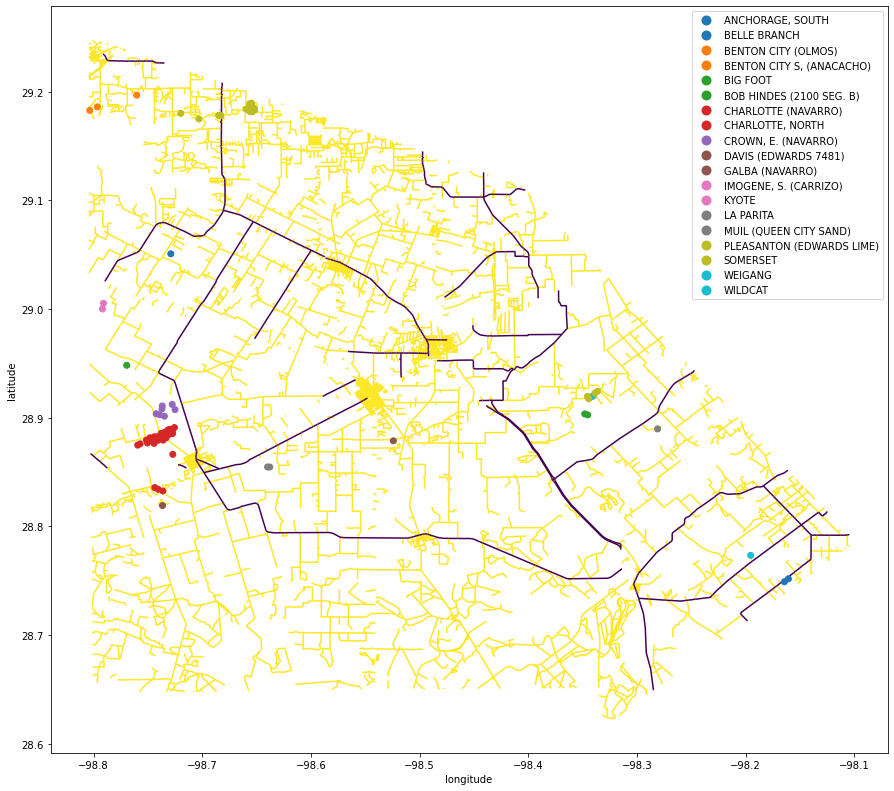

In [7]:
ax = basemap.plot(column='DISP_CODE', figsize=(15,15), zorder=0)
spatial.plot(column='FIELD_NAME', legend=True, ax=ax, zorder=1)

plt.xlabel('longitude')
plt.ylabel('latitude')

### Cluster wells into groups

In [8]:
CLUSTER_RADIUS = 1 #mile
clusters = [] # List of dataframes - each one containing a cluster of wells within ~ a [CLUSTER_RADIUS] mile radius

for i in spatial_valid.index:
    well = spatial_valid[spatial_valid.index==i]
    coordinates = (well['LONG83'].mean(), well['LAT83'].mean())
    findsCluster = False
    
    for j, C in enumerate(clusters):
        if angleToDist(coordinates, ( C['LONG83'].mean(), C['LAT83'].mean() ) ) < CLUSTER_RADIUS:
            temp = clusters[j].append(well) # if the well is close enough to a cluster, append it to the cluster dataframe
            clusters[j] = temp
            findsCluster = True
            break
        
    if not findsCluster: # otherwise create a new dataframe in the list
        clusters.append(well)
        
cluster_centers = [( C['LONG83'].mean(), C['LAT83'].mean() ) for C in clusters] # list of the centers of corresponding clusters

In [9]:
len(clusters)

22

Text(101.625, 0.5, 'latitude')

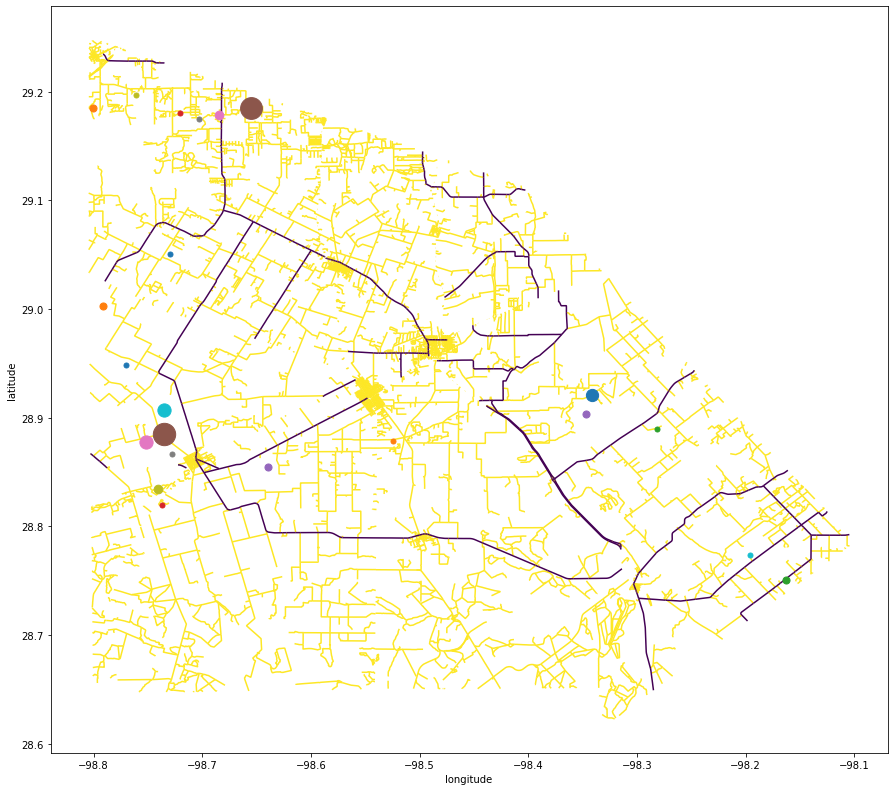

In [10]:
# Plot the clusters - the bigger the size, the greater the cluster
ax = basemap.plot(column='DISP_CODE', figsize=(15,15), zorder=0)
for i, C in enumerate(cluster_centers):
    plt.scatter(C[0], C[1], s=25*len(clusters[i]))

plt.xlabel('longitude')
plt.ylabel('latitude')

### Translate shapefile into Networkx Digraph

In [11]:
roads = nx.read_shp(r'Maps\Basemap013\road013l.shp')

for e in roads.edges.data():
    roads[e[0]][e[1]]['Distance'] = angleToDist(e[0], e[1])
    
    if (e[1], e[0]) not in roads.edges: # checks for duplicates
        roads.add_edge(e[1], e[0]) # adds inverse edge
        
        for A in e[2]:
            roads[e[1]][e[0]][A] = e[2][A]

In [12]:
nx.number_strongly_connected_components(roads)

187

Notice that there are many separate components, which separate the clusters. In Atascosa, there's one central connection and several small connections, often just two nodes. The following cells connect these small components to the main one.

In [13]:
strong_components = [c for c in sorted(nx.strongly_connected_components(roads), key=len, reverse=True)]
centers = [(sum(x[0] for x in c)/len(c), sum(x[1] for x in c)/len(c)) for c in strong_components]

In [14]:
def sq_dist(X, Y): # finds the squared euclidian distance between two tuples
    return (X[0]-Y[0])**2 + (X[1]-Y[1])**2


connected_roads = roads.copy()
conn_X, conn_Y = [], []

for c in strong_components[1:]:
    center = (sum(x[0] for x in c)/len(c), sum(x[1] for x in c)/len(c)) # finds center of the component
    
    main_node = (0,0) # finds closest point of main component to other
    for x in strong_components[0]:
        if sq_dist(x, center) < sq_dist(main_node, center):
            main_node = x
            
    side_node = (0,0) # finds closest point of other component to the previous point
    for x in c:
        if sq_dist(x, main_node) < sq_dist(side_node, main_node):
            side_node = x
            
    connected_roads.add_edge(main_node, side_node, Distance = angleToDist(main_node, side_node) )
    connected_roads.add_edge(side_node, main_node, Distance = angleToDist(main_node, side_node) )
    conn_X.append([main_node[0], side_node[0]]) # used for displaying added roads
    conn_Y.append([main_node[1], side_node[1]])

In [15]:
nx.number_strongly_connected_components(connected_roads)

1

Now that everything's connected, we'll be able to travel to every well. Below is a visualization of the added edges.

Text(101.625, 0.5, 'latitude')

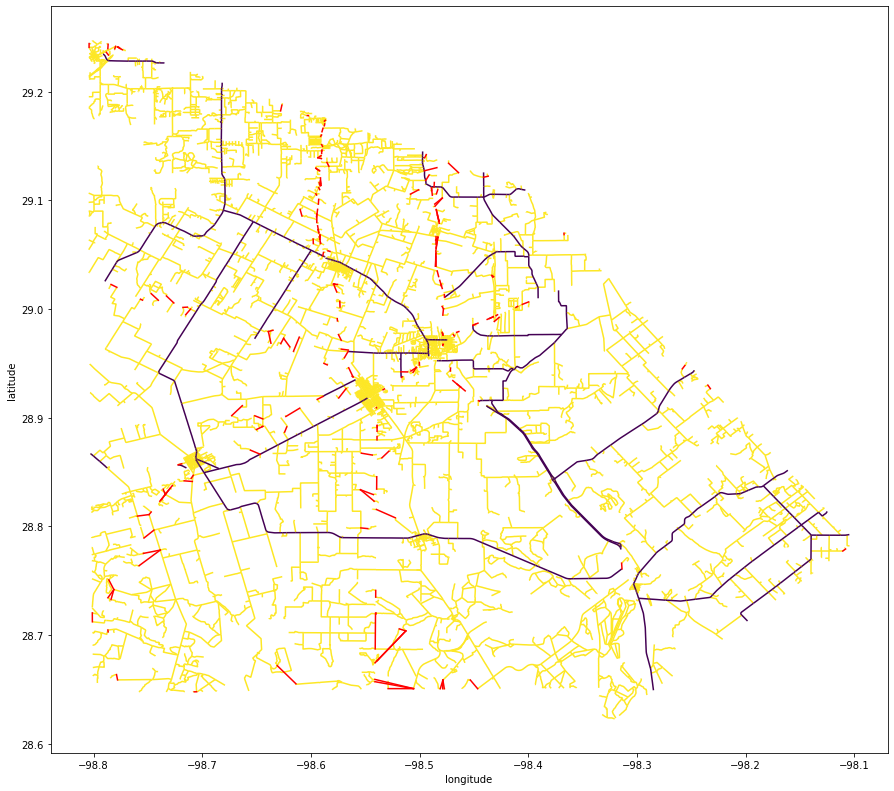

In [16]:
ax = basemap.plot(column='DISP_CODE', figsize=(15,15), zorder=0)

for i in range(len(conn_X)):
    plt.plot(conn_X[i], conn_Y[i], color='r')

plt.xlabel('longitude')
plt.ylabel('latitude')

### Add clusters to Digraph as nodes with an edge connected to the closest node already in the graph:

In [17]:
for i, C in enumerate(cluster_centers):
    coords = (C[0], C[1])
    
    closest = (0,0)
    for node in connected_roads.nodes:
        if angleToDist(coords, node) < angleToDist(coords, closest):
            closest = node
            
    connected_roads.add_node(coords, well=True, Size=len(clusters[i]))
            
    d = angleToDist(coords, closest)
    connected_roads.add_edge(coords, closest, Distance = d)
    connected_roads.add_edge(closest, coords, Distance = d)

In [18]:
# This cell acts as a test to determine if a path exists between each well
reachable = []

for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        p1 = cluster_centers[i]
        p2 = cluster_centers[j]
        reachable.append((i, j, nx.has_path(connected_roads, p1, p2)))
        
len(reachable), sum(int(x[2]) for x in reachable) # We want both values to be equal

(231, 231)

## Store the completed environment

In order to save on time and convenience, we can store the compiled environment as a shapefile with directory: '.\Atascosa'

In [19]:
nx.write_shp(connected_roads, r'Atascosa')

The following code is necessary in order to load the data:

In [20]:
# the 'edges' data will create the nodes and edges, while the 'nodes' data will modify the existing nodes
Atascosa = nx.read_shp(r'Atascosa\edges.shp')
nodes_data = nx.read_shp(r'Atascosa\nodes.shp')

# NetworkX doesn't seem to copy duplicate edges, so we'll need to recreate them
for e in Atascosa.edges.data():
    if (e[1], e[0]) not in Atascosa:
        Atascosa.add_edge(e[1], e[0])
        
        for A in e[2]:
            Atascosa[e[1]][e[0]][A] = e[2][A]
        
# Here we re-apply the node data to the graph
for n in nodes_data.nodes.data():
    for A in n[1]: # A represents an attribute
        Atascosa.nodes[n[0]][A] = n[1][A]

In [21]:
# This is a test ensuring that both have similar strongly_connected_components
[len(x) for x in nx.strongly_connected_components(Atascosa)]==[len(x) for x in nx.strongly_connected_components(connected_roads)]

True

In order to extract the clusters, run the following:

In [22]:
new_clusters = []
for x in Atascosa.nodes.data():
    if x[1]['well']=='1':
        new_clusters.append(tuple([x[0], x[1]['Size']])) # the size variable can be removed if unwanted
new_clusters

[((-98.346983635, 28.90336087), 2),
 ((-98.68425455333333, 29.17836441), 3),
 ((-98.74054584333332, 28.83449039333333), 3),
 ((-98.63923124499999, 28.85497386), 2),
 ((-98.80039774, 29.184725325000002), 2),
 ((-98.70341999, 29.17525964), 1),
 ((-98.76985064, 28.9485843), 1),
 ((-98.72930564, 29.05115702), 1),
 ((-98.16279453499999, 28.750711709999997), 2),
 ((-98.735289493, 28.884813801), 20),
 ((-98.75172126999999, 28.87813230142857), 7),
 ((-98.52448421, 28.87908197), 1),
 ((-98.19564892, 28.7736562), 1),
 ((-98.73690283, 28.81946942), 1),
 ((-98.28129662, 28.89002402), 1),
 ((-98.76065773, 29.19713571), 1),
 ((-98.73506198285712, 28.90698824714286), 7),
 ((-98.72745071, 28.86660764), 1),
 ((-98.65527190210526, 29.18506977894737), 19),
 ((-98.72010547, 29.18036479), 1),
 ((-98.34134356999999, 28.920911033333336), 6),
 ((-98.791694495, 29.00298879), 2)]

Below is a visualization of the clusters, which match the previous graphs.

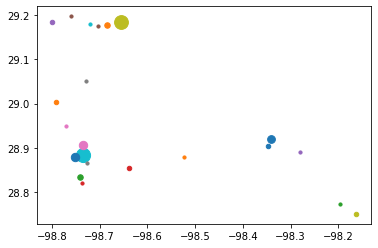

In [23]:
for x in new_clusters:
    plt.scatter(x[0][0], x[0][1], s=10*x[1])